# Spam SMS Detection
we'll explore techniques for detecting spam SMS messages. Spam detection is an essential task in natural language processing and text classification

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import chardet
import nltk
import wordcloud
import warnings
# Ignore the warning
warnings.filterwarnings('ignore')

In [81]:
# Read the CSV file with specified encoding
df = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')

In [82]:
# Displaying the first few rows of the dataframe
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [83]:
#Columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [84]:
# drop columns having NaN values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [85]:
df.shape

(5572, 2)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [87]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True) ## change the columns name from v1 , v2 to target and text
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [88]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [89]:
df['target'] = encoder.fit_transform(df['target'])

In [90]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


"After applying label encoding, the target values are transformed such that **'ham' is encoded as 0** and **'spam' is encoded as 1**."

In [91]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [92]:
df.duplicated().sum()

403

remove the duplicate first

In [93]:
df = df.drop_duplicates(keep='first')

In [94]:
df.duplicated().sum()

0

In [95]:
df.shape

(5169, 2)

In [96]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

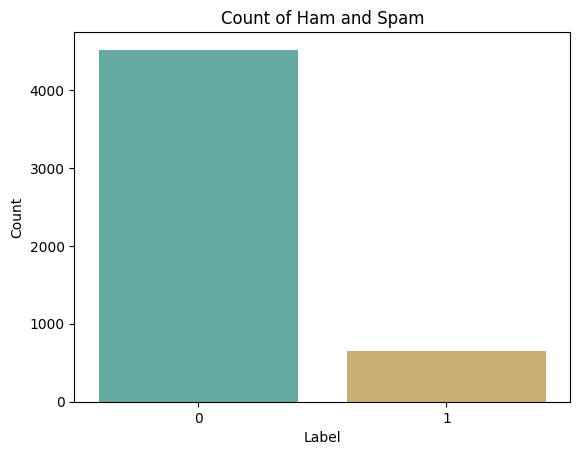

In [98]:
sns.countplot(data=df, x='target', palette=['#5ab4ac','#d8b365'])

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Ham and Spam')
plt.show()

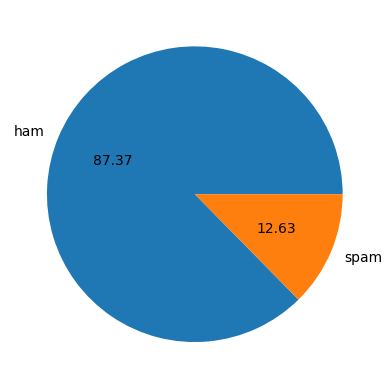

In [99]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

##### From above plot it can be seen that the data is so much imbalanced

In [100]:
nltk.download('punkt') ##package is specifically used for sentence tokenization.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [101]:
df.loc[:, 'num_characters'] = df['text'].apply(len)

create a new column num_characters to the dataframe df, where each value in this column represents the number of characters in the corresponding message in the text column. This can be useful for analyzing the length of messages.

In [102]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [103]:
df.loc[:, 'num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

The code adds a new column, num_words, to the dataframe df, which contains the number of words in each text message.

In [104]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [105]:
df.loc[:, 'num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

create a new column to the dataframe called 'num_sentences', which represents the number of sentences in each text entry. It utilizes the apply function along with a lambda function to apply the nltk.sent_tokenize() function to each text entry in the 'text' column, calculating the length of the resulting list of sentences.

In [106]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [107]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [108]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [109]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


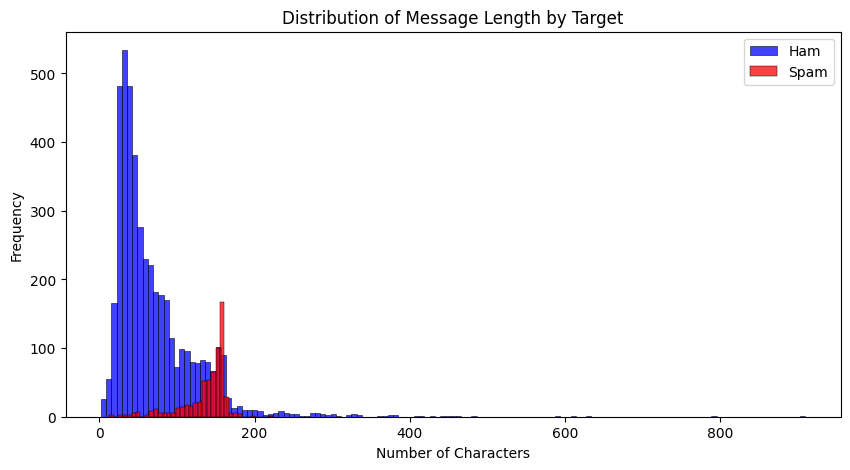

In [110]:
# Set figure size
plt.figure(figsize=(10,5))

# Plot histogram for 'ham' messages (Label 0)
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Ham')

# Plot histogram for 'spam' messages (Label 1)
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Spam')

# Add labels and title
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Message Length by Target')
plt.legend()  # Show legend
plt.show()

The graph shows that the distribution of message lengths can be used to distinguish between ham and spam messages,with spam massages being more likely to be shorter than ham massages

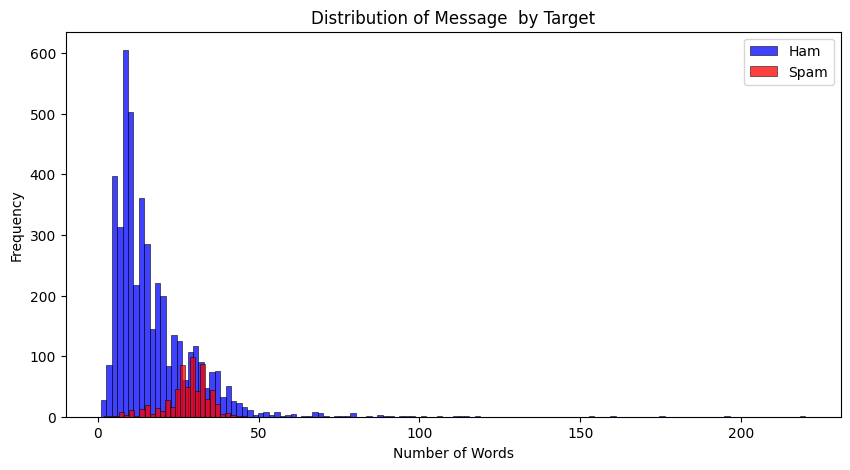

In [111]:
plt.figure(figsize=(10,5))

# Plot histograms for 'ham' and 'spam' messages
sns.histplot(df[df['target'] == 0]['num_words'], label='Ham', color='blue')
sns.histplot(df[df['target'] == 1]['num_words'], label='Spam', color='red')

# Add labels and title
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Message  by Target')
plt.legend()
plt.show()

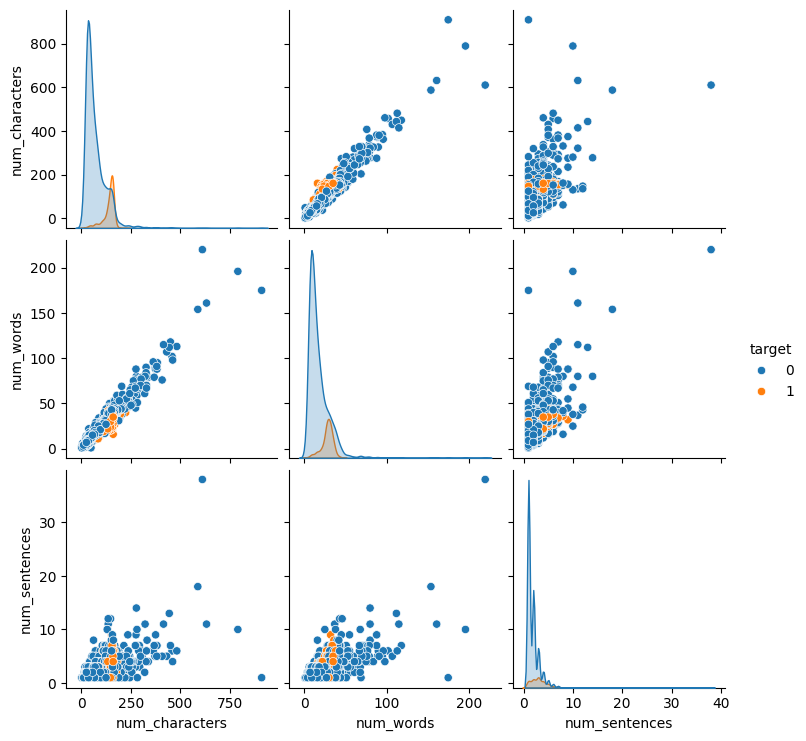

In [112]:
sns.pairplot(df,hue='target')

# Data Processing


In [113]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Downloads needed resources
nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This function performs the following tasks:

Converts text to lowercase.

Tokenizes the text into words.

Removes non-alphanumeric characters.

Removes stopwords and punctuation.

Stems the remaining words using PorterStemmer.

In [117]:
transform_text("I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.")

'search right word thank breather promis wont take help grant fulfil promis wonder bless time'

In [118]:
df['text'][13]

"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."

In [120]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('searching')

'search'

In [121]:
df.loc[:, 'transformed_text'] = df['text'].apply(transform_text)

In [122]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


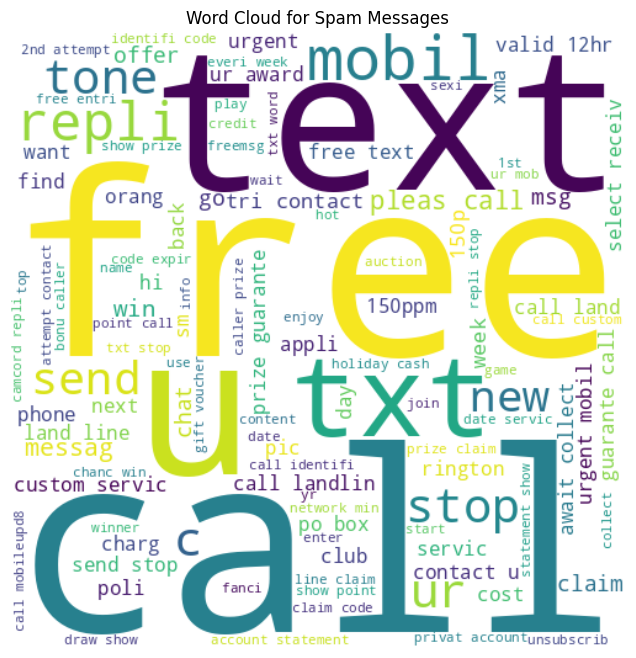

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate the WordCloud for spam messages
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Spam Messages')
plt.show()


In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

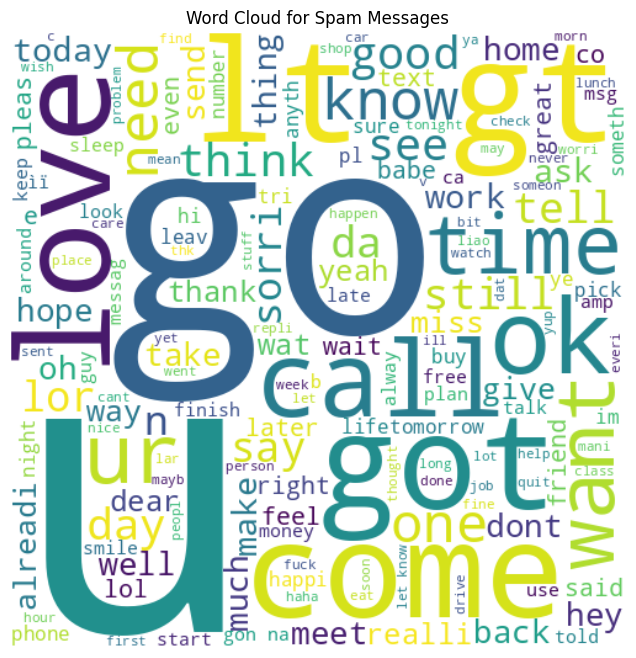

In [126]:
# Generate the WordCloud for ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Spam Messages')
plt.show()


In [128]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [129]:
len(spam_corpus)

9939

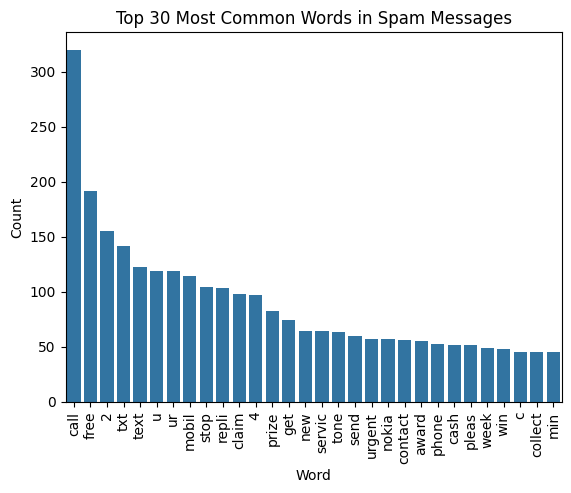

In [132]:
# Get the most common words in spam messages
spam_counts = Counter(spam_corpus).most_common(30)

# Create a DataFrame
df_spam_counts = pd.DataFrame(spam_counts, columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Word', y='Count', data=df_spam_counts)

# Rotate x-axis labels
plt.xticks(rotation='vertical')


plt.title('Top 30 Most Common Words in Spam Messages')

plt.show()

In [133]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [134]:
len(ham_corpus)

35404

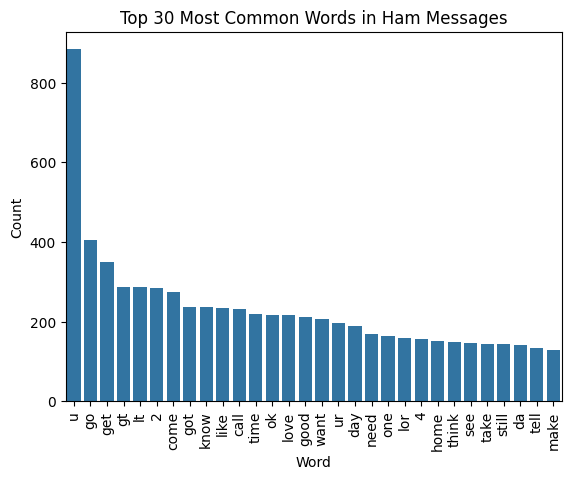

In [135]:
# Get the most common words in ham messages
ham_counts = Counter(ham_corpus).most_common(30)

# Create a DataFrame
df_ham_counts = pd.DataFrame(ham_counts, columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Word', y='Count', data=df_ham_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Add title
plt.title('Top 30 Most Common Words in Ham Messages')

# Show plot
plt.show()

In [136]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


# Modeling

In [137]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [138]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [139]:
X.shape

(5169, 3000)

In [140]:
y = df['target'].values

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [143]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [144]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [148]:
# Training the models
gnb.fit(X_train, y_train)


GaussianNB()

In [149]:
mnb.fit(X_train, y_train)


MultinomialNB()

In [150]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [151]:
# Predictions
gnb_preds = gnb.predict(X_test)
mnb_preds = mnb.predict(X_test)
bnb_preds = bnb.predict(X_test)

In [153]:
# Accuracy scores
gnb_accuracy = accuracy_score(y_test, gnb_preds)
mnb_accuracy = accuracy_score(y_test, mnb_preds)
bnb_accuracy = accuracy_score(y_test, bnb_preds)

In [154]:
# Confusion matrices
gnb_confusion = confusion_matrix(y_test, gnb_preds)
mnb_confusion = confusion_matrix(y_test, mnb_preds)
bnb_confusion = confusion_matrix(y_test, bnb_preds)

In [155]:
# Precision scores
gnb_precision = precision_score(y_test, gnb_preds)
mnb_precision = precision_score(y_test, mnb_preds)
bnb_precision = precision_score(y_test, bnb_preds)

In [156]:
print("Gaussian Naive Bayes:")
print("Accuracy:", gnb_accuracy)
print("Confusion Matrix:\n", gnb_confusion)
print("Precision:", gnb_precision)

Gaussian Naive Bayes:
Accuracy: 0.8694390715667312
Confusion Matrix:
 [[788 108]
 [ 27 111]]
Precision: 0.5068493150684932


In [157]:
print("\nMultinomial Naive Bayes:")
print("Accuracy:", mnb_accuracy)
print("Confusion Matrix:\n", mnb_confusion)
print("Precision:", mnb_precision)


Multinomial Naive Bayes:
Accuracy: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision: 1.0


In [158]:
print("\nBernoulli Naive Bayes:")
print("Accuracy:", bnb_accuracy)
print("Confusion Matrix:\n", bnb_confusion)
print("Precision:", bnb_precision)


Bernoulli Naive Bayes:
Accuracy: 0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision: 0.991869918699187


In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [161]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [162]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [163]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [164]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [165]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name,":")
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC :
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN :
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB :
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT :
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR :
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF :
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost :
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC :
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC :
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT :
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb :
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [166]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [167]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


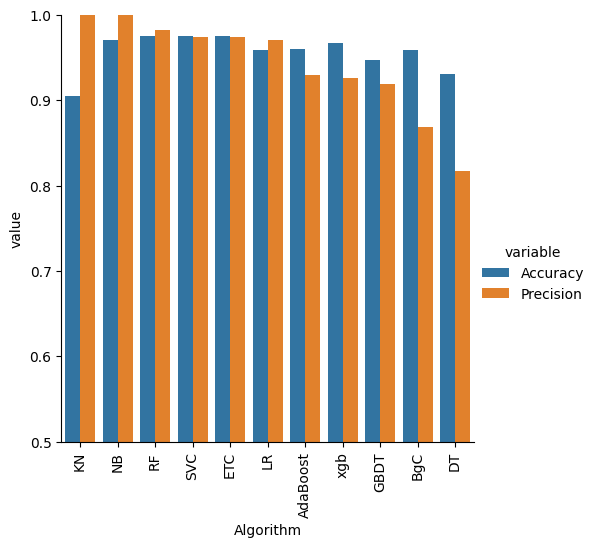

In [168]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [169]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [170]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [171]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [172]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [173]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [174]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [175]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [176]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [177]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [178]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [179]:
# Now we will apply stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [180]:
from sklearn.ensemble import StackingClassifier

In [181]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [182]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832
